(thermography)=
# Thermografie als Messmethode

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Messmethode Thermografie verstehen </li>
        <li> mit Strahlungsgesetzen </li>
        <li> um Messungen beurteilen zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/locale.py'>


### Grafikparameter einstellen

In [7]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Wärmestrahlung

### Eigenschaften der Temperaturstrahlung

Jeder Körper oder Stoff sendet bei Temperaturen oberhalb des absoluten Nullpunkts ($T = 0\text{ K}$, d.h. $\vartheta =−273, 15\text{°C}$) eine  thermisch angeregte elektromagnetische Strahlung aus. Bei festen, nichttransparenten Körpern und nichttransparenten Flüssigkeiten ist die Strahlung allein durch die Oberflächentemperatur definiert. Bei semitransparenten Stoffen spielen auch Anteile tiefer liegender Schichten eine Rolle. Gase sind Volumenstrahler, deren Strahlung durch die Temperatur ihres gesamten Volumens bestimmt wird.<br><br>
Die Strahlungsleistung (Strahlungsfluss) $\Phi_e$
\begin{equation}
\Phi_e = \frac{dQ_e}{dt}\text{ mit }   [\Phi_e] = \text{W} 
\end{equation}

bezieht sich auf die Strahlungsenergie (Strahlungsmenge) $Q_e = \int Q(\lambda)d\lambda$ mit der Einheit $[Q_e] = \text{Ws} = \text{J}$.

Die spezifische Ausstrahlung $E$ eines Strahlers mit der Strahlerfläche $A$ ist:
\begin{equation}
E = \frac{d\Phi_e}{d A}\text{ mit } [E] = \frac{\text{W}}{\text{m}^2}   
\end{equation}

Bezieht man die Bestrahlungsstärke $E$, die auf eine Fläche auftrifft auf diese Empfängerfläche $A$, so erhält man in ähnlicher Weise:
\begin{equation}
E = \frac{d\Phi_e}{dA} \text{ mit } [E] = \frac{\text{W}}{\text{m}^2}   
\end{equation}

Die Übertragungsstrecke für die Temperaturstrahlung besteht aus den Oberflächeneigenschaften von Strahler, Empfänger und eventuellen reflektierenden Flächen sowie aus den Eigenschaften des Mediums, durch dass die Strahlung hindurch transmittiert wird. <br><br>
Diese Eigenschaften sind häufig stark von der Wellenlänge $\lambda$ der Strahlung und der Temperatur $T$ des Materials abhängig.<br><br>
Der spektrale Absorptionsgrad $\alpha(\lambda,T)$ beschreibt das Verhältnis der von einem Stoff absorbierten Strahlungsleistung $\Phi_a (\lambda,T)$ und der auftreffenden Strahlungsleistung $\Phi_0(\lambda)$:
\begin{equation}
\alpha(\lambda,T) = \frac{\Phi_a(\lambda,T)}{\Phi_0(\lambda)}\text{ mit }[\alpha]=1 
\end{equation}

Ein *schwarzer Körper* absorbiert alle auf ihn auftreffenden Photonen, d.h. die gesamte Strahlungsleistung, die ihn erreicht. Daher gilt:
\begin{equation}
\alpha_{\text{schwarzer Körper}} (\lambda,T) = 1 
\end{equation}

Für einen schwarzen Körper gilt das Plancksche Strahlungsgesetz. Es beschreibt die Strahlungsleistung eines schwarzen Strahlers der Temperatur $T$:
\begin{equation}
E_{1,\lambda,\text{schwarz}} = \frac{2\pi\cdot c_0^2\cdot h}{\lambda^5 \left[e^{\frac{hc_0}{\lambda k T}} - 1\right]}
\end{equation}

Hier sind die Naturkonstanten $c_0$ die Lichtgeschwindigkeit im Vakuum, $h$ das Plancksche Wirkungsquantum und $k$ die Boltzmann-Konstante.

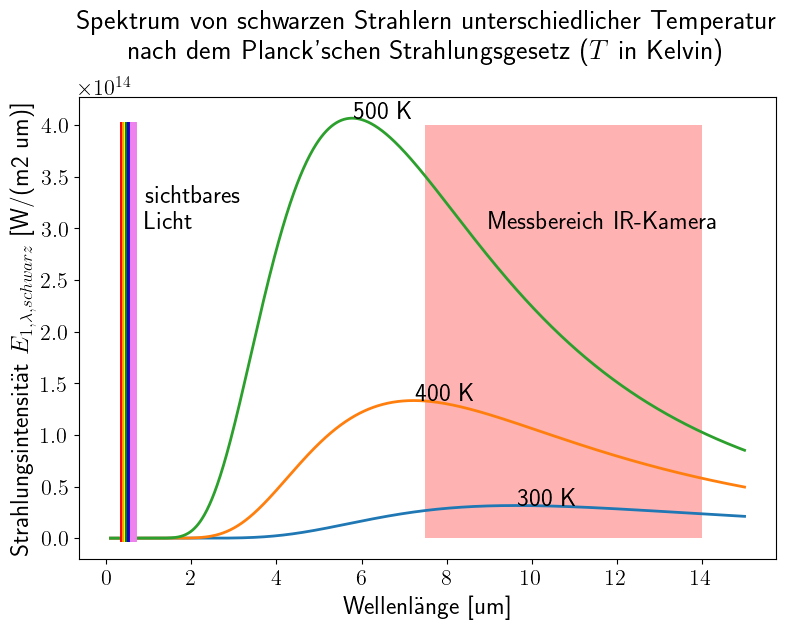

In [8]:
c0=3e8
h=6.6e-34
k=1.38e-23
T=np.linspace(300,500,3)
lam=np.linspace(1e-7,15e-6,1000) # 1e-7 ungefähr Null, sonst Div durch 0
plt.figure(figsize=(9,6))

for t in T:
    E=2*np.pi*h*c0**2/((lam**5)*(np.exp(h*c0/(lam*k*t))-1))
    mx=1e6*np.nanmax(E)
    plt.plot(1e6*lam,1e6*E)
    plt.annotate(str(int(t))+' K',xy=(2898/t,mx), fontsize=18)
plt.xlabel('Wellenlänge [um]')
plt.ylabel('Strahlungsintensität $E_{1,\lambda,schwarz}$ [W/(m2 um)]')# \n$E_{1,\lambda,schwarz}$ [W/(m2 μm)]')
plt.title("Spektrum von schwarzen Strahlern unterschiedlicher Temperatur \nnach dem Planck’schen Strahlungsgesetz ($T$ in Kelvin)"+"\n")

lamvis = np.linspace(400e-9, 750e-9, 10) # sichtbare Wellenlängen
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i in range(len(colors)):
   plt.plot([1e6*lamvis[i],1e6*lamvis[i]], [0,4e14], c=colors[i], lw=5, marker='.')
plt.text(1.2*1e6*lamvis[-1],3e14,'sichtbares \nLicht')
lamIRsens = np.linspace(7.5e-6,14e-6,2) # Messbereich Infrarotkamera FLIR
from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1e6*lamIRsens[0], 0), 1e6*(lamIRsens[-1]-lamIRsens[0]), 4e14,
                      alpha=0.3, facecolor='red'))
plt.text(1.2*1e6*lamIRsens[0],3e14,'Messbereich IR-Kamera')
plt.show()

Durch die Integration der spektralen Strahldichte $L_{\lambda,\text{schwarz}}$ erhält man das Stefan-Boltzmann-Gesetz für die Strahldichte eines schwarzen Körpers:
\begin{equation}
L_{\text{schwarz}} = \frac{\sigma}{\pi\Omega_0} T^4 
\end{equation}

Die Größe $\sigma$ ist die Stefan-Boltzmann-Konstante:
\begin{equation}
\sigma = \frac{2\cdot \pi^5 \cdot k^4}{15\cdot h^3 \cdot c_0^2} = 5.67032\cdot 10^{-8}\frac{\text{W}}{\text{m}^2\cdot\text{K}^4}    
\end{equation}

Daraus ergibt sich für die spezifische Ausstrahlung eines spektralen Körpers:
\begin{equation}
E_{1,\text{schwarz}} = \int_0^\infty E_{1,\lambda,\text{schwarz}}(\lambda,T)\cdot d\lambda = \sigma\cdot T^4
\end{equation}

### Die Knotenregel der Strahlungsenergie und das Kirchhoffsche Strahlungsgesetz

![Knotenregel Wärmestrahlung](../img/knotenregel-waermestrahlung.svg)

Wir betrachten zunächst nur die Strahlungsquelle Umgebungstemperatur: Wegen der Energieerhaltung gilt für jede Wellenlänge, dass Strahlung entweder nur absorbiert, reflektiert oder transmittiert werden kann. Daher gilt:
\begin{equation}
\Phi_0(\lambda) = \Phi_a(\lambda,T)+\Phi_r(\lambda,T)+\Phi_t(\lambda,T)
\end{equation}

Der spektrale Reflexionsgrad $\rho (\lambda,T)$ eines Körpers beschreibt das Verhältnis der reflektierten Strahlungsleistung $\Phi_r (\lambda,T)$ zur auftreffenden Strahlungsleistung:
\begin{equation}
\rho(\lambda,T) = \frac{\Phi_r (\lambda,T)}{\Phi_0(\lambda)}\text{ mit }[\rho]=1 
\end{equation}

Der spektrale Transmissionsgrad $\tau(\lambda,T)$ ist genauso bestimmbar anhand der durchgelassenen (transmittierten) Strahlungsleistung $\Phi_t(\lambda,T)$:
\begin{equation}
\tau(\lambda,T) = \frac{\Phi_t (\lambda,T)}{\Phi_0(\lambda)}\text{ mit }[\tau]=1 
\end{equation}

Durch Einsetzen der Definitionen für Absorptions-, Reflexions- und Transmissionsgrad erhält man:
\begin{equation}
\alpha(\lambda,T)+\rho(\lambda,T)+\tau(\lambda,T) = 1
\end{equation}

Nun betrachten wir zusätzlich die Strahlungsquelle Materialtemperatur: Im Strahlungsgleichgewicht gibt ein Strahler die gleiche Energiemenge durch Wärmestrahlung ab, die er auch durch absorbierte Strahlung wieder aufnimmt. Dies beschreibt das Kirchhoffsche Strahlungsgesetz:
\begin{equation}
\alpha(\lambda,T) = \varepsilon(\lambda,T)
\end{equation}

### Emissionsgrad, Emissivität

Die Größe $\varepsilon(\lambda,T)$ ist der spektrale Emissionsgrad, d.h. die spektrale Ausstrahlung eines Objektes bezogen auf die spektrale Ausstrahlung eines schwarzen Körpers derselben Temperatur:
\begin{equation}
\varepsilon_{\lambda} (\lambda,T) = \frac{E_{1,\lambda}(\lambda,T)}{E_{1,\lambda,\text{schwarz}}(\lambda,T)}
\end{equation}

Der Emissionsgrad $\varepsilon_{\lambda}(\lambda,T)$ (auch Emissivität) beeinflusst das Messergebnis der thermografischen Messung erheblich. Daher ist für einen Wellenlängenbereich von $\lambda_1$ bis $\lambda_2$ (z. B. den Empfindlichkeitsbereich des Sensors der Thermografiekamera) der Bandemissionsgrad $\varepsilon_{\lambda,B}$ von Bedeutung, der den integrierten Emissionsgrad im betrachteten Wellenlängenband beschreibt. Nur im
allgemeinen Fall, d.h. für $\lambda_1=0$ und $\lambda_2 = \infty$ spricht man vom Gesamtemissionsgrad $\varepsilon (T)$.

VDI/VDE 3511 Blatt 4 gibt die Werte des Emissionsgrads wieder. Zudem finden sich auch Diagramme der Abhängigkeit des Emissionsgrads von der Temperatur in {cite:p}`micro-epsilon_messtechnik_gmbh__co_kg_mehr_2002`.

### Graue und selektive Strahler

Graue Strahler sind solche Strahler, die im interessierenden Wellenlängenbereich einen konstanten Emissionsgrad besitzen, der geringer ist als der eines schwarzen Strahlers derselben Temperatur. <br><br>
Selektive Strahler besitzen zudem einen wellenlängenabhängigen Emissionsgrad. <br><br>
Bei der Thermografie ist zudem zu beachten, dass Emissionsgrad, Reflexionsgrad und Transmissionsgrad genauso wie die Temperaturen von Messobjekt und Umgebung örtlich variabel sein können. <br><br>
Es gilt jedoch weiterhin die Energieerhaltung an jedem Messpunkt:
\begin{equation}
\alpha(\lambda,T,x,y) + \rho(\lambda,T,x,y) + \tau(\lambda,T,x,y) = 1
\end{equation}

Der spektrale Emissionsgrad hängt von folgenden Faktoren ab:
- Stoffzusammensetzung
- Kristallinität: Korngröße, Versetzungen
- Oberfläche: Rauheit, Flüssigkeitsfilm, Oxidation
- Temperatur des Stoffes
- Strahlungsrichtung
- Wellenlänge

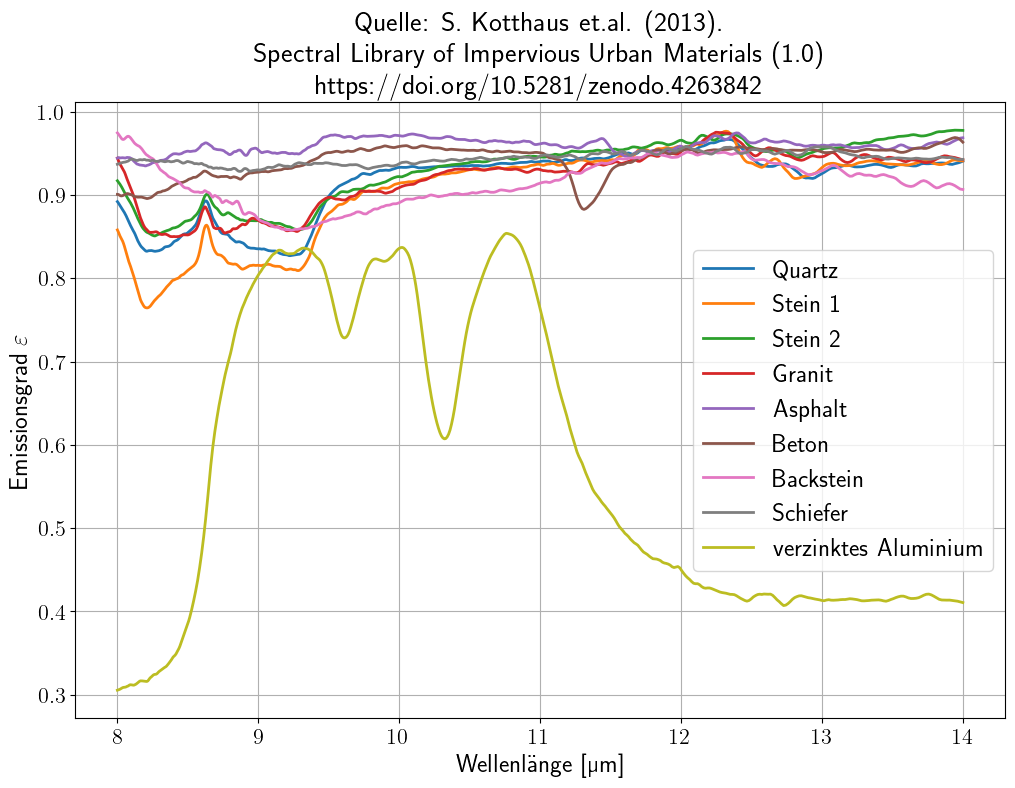

In [12]:
urban = pd.read_csv('https://zenodo.org/record/4263842/files/LUMA_SLUM_IR.csv?download=1')
urban.rename(columns = {'wavelength':'Wellenlänge [µm]',
                       'X001':'Quartz',
                       'S001':'Stein 1',
                       'S003':'Stein 2',
                       'G001':'Granit',
                       'A001':'Asphalt',
                       'C001':'Beton',
                       'B004':'Backstein',
                       'L002':'Schiefer',
                       'Z001':'verzinktes Aluminium'}, inplace = True)
urban.plot(figsize=(12,8),x='Wellenlänge [µm]', y=['Quartz','Stein 1','Stein 2','Granit','Asphalt','Beton',
                                    'Backstein','Schiefer','verzinktes Aluminium'],
          title = 'Quelle: S. Kotthaus et.al. (2013). \nSpectral Library of Impervious Urban Materials (1.0) \nhttps://doi.org/10.5281/zenodo.4263842')
plt.ylabel(r'Emissionsgrad $\varepsilon$')
plt.grid()
plt.show()

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Sind Silizium und Glas schwarze, graue oder selektive Strahler? Falls letzteres: In welchem Wellenlängenbereich ist die Transmission hoch bzw. niedrig? In welcher technischen Anwendung spielen diese Effekte eine Rolle und warum? Wie sind Messergebnisse zu interpretieren?
</div>

*Antwort:...*

Hinzu kommt die Transmissivität der Übertragungsstrecke: Beispielsweise absorbiert insbesondere Wasserdampf selektiv im Infrarotbereich (größter Anteil am Treibhauseffekt). Dies wirkt sich jedoch erst bei großen Distanzen aus, nicht an Fassaden oder in Produktionsumfeldern bzw. an  Geräten.

## Strahlungs-Thermometer

### Vorteile von Strahlungsthermometern

<a title="U.S. Navy photo by Photographer&#039;s Mate 3rd Class Lamel J. Hinton (RELEASED), Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Pyrometer_040824.jpg"><img width="256" alt="Pyrometer 040824" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Pyrometer_040824.jpg/256px-Pyrometer_040824.jpg"></a>

Strahlungsthermometer messen die mittlere Temperatur einer Messfläche berührungsfrei. Vorteile gegenüber der Messung mit Berührungsthermometern sind insbesondere:
- berührungslos
- bei kleiner Wärmekapazität (des Prüflings) möglich
- bei schlechter Wärmeleitfähigkeit (der zu messenden Oberfläche) möglich
- an bewegten Objekten möglich
- über Distanzen möglich
- an (elektrischer) Spannung führenden Objekten
- kontaminationsfrei an biologischen Materialien
- bei schnell veränderlichen Temperaturen
- Temperaturverteilungen (u.a. mit Thermografie)
- Temperaturen oberhalb von 1500 ∘ C (Vorsicht: auch ein Strahlungssensor kann überstrahlt werden und dadurch Schaden nehmen!)

### Fehlerquellen bei der Messung der Strahlungstemperatur

Soll Strahlung als dominierender physikalischer Effekt dienen, ist trotzdem zu beachten, dass das Sensorelement durch seine Halterung über Wärmeleitung und durch eventuell vorhandene Gasströme / Luftströme in seiner Temperatur beeinflusst wird und somit der Messwert verfälscht werden kann.

Durch die Eigenschaften des Strahlungssensors, der Übertragungsstrecke für die Strahlung und auch des Messobjektes selbst, ergeben sich eine Reihe von systematischen Messfehlern (siehe {cite:p}`bernhard_handbuch_2014`:
- Emissionsgrad $\varepsilon_{\lambda}(\lambda,T,x,y)\leq1$ und Absorptionsgrad $\alpha_{\lambda}(\lambda,T,x,y)\leq1$ der Objekte in der Messszene (Strahler, Flächen)
- Richtungsabhängigkeit der Strahler
- Hintergrundstrahlung bei (semi)transparenten Messobjekten
- Fremdstrahlung von Objekten anderer Temperatur (direkt oder reflektiert)
- Strahlung von Gehäuse-Innenseite, Objektiv, Filter und Blenden
- Transmissionsgrad(e) in der Übertragungsstrecke, der Optik $\tau_O(\lambda)\leq1$ und von Filtern $\tau_F(\lambda)\leq1$
- teilweise nicht kalibrierbare gerätebezogene Einflussfaktoren: optische oder geometrische Fehler des Messgerätes, Strahlung der Gehäuse-Innenseite, Transmissionsgrad der Optik und von Filtern, relative spektrale Empfindlichkeit des Sensors, Drift und Unsicherheit von Detektor und weiterer Messwandlungsstufen, Rauschen der elektronischen Baugruppen
- örtliche Verteilung (Randeinfluss, etc.) der Detektorempfindlichkeit
- Verschmutzung im Übertragungsweg, z. B. Objektiv
- unzulässig hohe oder niedrige Gerätetemperatur, für die nicht kalibriert werden kann, bzw. die das Messgerät beschädigt
- zu rasche Temperaturänderung, die der Detektor nicht abbilden kann

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Geben Sie in der folgenden Tabelle konkrete Beispiele für Messfehler an (mit Materialangabe) und nennen Sie Abhilfemaßnahmen.
</div>

| Fehlerquelle | Material für Beispiel | Auswirkung des Fehlers | Abhilfe |
|-|-|-|-|
| Emissionsgrad falsch eingeschätzt | ... | ... | ... |
| Richtungsabhängigkeit eines Strahlers nicht beachtet | ... | ... | ... |
| Hintergrundstrahlung vernachlässigt | ... | ... | ... |
| Fremdstrahlung von Objekten anderer Temperatur übersehen | ... | ... |... |

Zur Kalibration können Kennlinien für verschiedene Umgebungstemperaturen und Emissionsgrade aufgenommen werden. Wenn der Emissionsgrad und die Umgebungstemperatur bekannt sind, können deren Einflüsse auf das Messergebnis korrigiert werden. Dies kann geräteintern implementiert werden, indem ein Chopperrad, das die Gerätetemperatur besitzt im Messstrahlengang vermessen wird. Diese Größe wird nun von der Messgröße beim Vermessen des Messobjektes abgezogen.

Gibt man der Gerätesoftware einen abweichenden Emissionsgrad vor, so kann das Signal mit $1/\varepsilon$ verstärkt werden. Dies gilt dann, wenn die Übertragungsstrecke zwischen Thermometer, Messobjekt und Umgebung sich sehr ähnlich oder gleich verhält wie bei der Kalibration am schwarzen Strahler. Zudem ist es wichtig, dass die Bedingungen im Inneren des Thermometers und dessen Geräteparameter (z. B. Verstärkung, Empfindlichkeit) zeitlich konstant sind.

Die Angabe des Emissionsgrades ist mit erheblichen Unsicherheiten verbunden, da zum Einen die Werte nicht sehr gut bekannt sind und zum Anderen der Emissionsgrad während der Messung veränderlich sein kann. Dadurch entsteht ein Messfehler in Abhängigkeit von Temperatur und Wellenlängenbereich. Eine ausführliche Darstellung dieser Fehler findet sich in der VDI/VDE 3511 Blatt 4.

Da bei Metallen die Wärmestrahlung praktisch eine reine Oberflächeneigenschaft darstellt, haben Veränderungen wie Rauheit oder Oxidation einen großen Einfluss auf den Emissionsgrad. Mit dem Rauheitsfaktor $R_F = A_O /A_R$, also dem Verhältnis zwischen glatter Oberfläche $A_O$ und rauer Fläche $A_R$ lässt sich ein effektiver Emissionsgrad $\varepsilon_{eff}$ abschätzen:
\begin{equation}
\varepsilon_{eff}=\frac{1}{1+\left(\frac{1}{\varepsilon_{glatt}}-1\right)\cdot R_F}
\end{equation}

Da die Tabellenwerke häufig ungenau und unvollständig sind, beinhaltet {cite:p}`bernhard_handbuch_2014` auf Seite 1234 eine Auflistung von Tabellenwerken mit Datenzusammenstellungen für den Emissionsgrad unter unterschiedlichsten Bedingungen.

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Möglichkeiten gibt es, um den Emissionsgrad einer Oberfläche zu erhöhen?
</div>

*Antwort:...*

## Thermografie

### Örtlich aufgelöste Strahlungs-Thermometrie

Bei der Thermografie befindet sich anstatt eines einzelnen Sensors ein ganzer Array von Sensoren im Messgerät. Dadurch werden örtlich aufgelöste Messungen möglich und die Bildverarbeitung ermöglicht weitere Anwendungen:
- zerstörungsfreie Werkstoffprüfung
- Erkennung und Ortung von wärmeren und kälteren Zonen an Messobjekten
- (Früh-)Erkennung von Schäden an Maschinen, Bauteilen und Bauwerken
- Zielverfolgung von sich bewegenden Objekten und von Lecks in Behältern und Rohrleitungen

Der Kamerachip in einer Thermografiekamera ist ein Mikrobolometerarray, d.h. eine zweidimensionale Matrix aus vielen kleinen Bolometern. Ein Bolometer absorbiert Infrarotstrahlung und erwärmt einen temperaturabhängigen Widerstand. Diese können sehr viel besser miniaturisiert werden als Thermosäulen (Serienschaltung von Thermoelementen) oder pyroelektrische Detektoren. Mikrobolometerarrays arbeiten bei Raumtemperatur, benötigen eine Temperatur-Stabilisierung und einen optischen Shutter, um zwischen Aufnahmen die Nullmessungen zu kalibrieren {cite:p}`hering_sensoren_2018-3`.

Ebenso kann für jeden Messpunkt $(x,y)$ ein Verhalten festgestellt werden, dass entweder einem schwarzen Strahler mit $\varepsilon(\lambda,T,x,y)=\varepsilon(x,y)=1$, einem grauen Strahler mit $\varepsilon(\lambda,T,x,y) < 1$ oder einem selektiven Strahler mit wellenlängenabhängigem Emissionsgrad, entspricht.

Die Kamerasoftware stellt die ermittelte Temperatur mittels einer Falschfarbendarstellung dar 
{cite:p}`kommer_tutorium_2015`.

### Kalibration

- vor jeder Messung integralen Emissionsgrad $\varepsilon(T) = \int_\lambda \varepsilon (\lambda)d\lambda$ bestimmen, z. B. durch Messung der Oberflächentemperatur mit Thermoelement
- Emissionsgrad anschließend in Kamera einstellen
- doppelte Messung $\to$ Vorteil der Thermografie?
- Alternative: Markierung ausgewählter Stellen mit schwarzer, nicht reflektierender Farbe oder durch Bohren eines Loches $\to \varepsilon=1$ an diesen ausgewählten Stellen
- auch mühsam ...

Emissionsgrade aus dem Tabellenbuch:
- fast alle nichtmetallischen Oberflchen: $\varepsilon = 0,8 .. 0,95$, siehe z. B. VDI Wärmeatlas oder VDI 3511 Blatt 4.5
- Vorsicht bei Metalloberflächen und stark reflektierenden Oberflächen

### Aufbau einer Thermografiekamera

Im Prinzip ist eine Wärmebildkamera wie eine normale digitale Kamera für sichtbares Licht aufgebaut. Jedoch verwendet eine Wärmebildkamera infrarotsensitive Sensoren und eine Optik (Objektiv) aus infrarotdurchlässigem Material (z. B. Germanium, Zinkselenid). Insbesondere stationäre Thermografiekameras kühlen den Bildsensor auf 70 K, damit die Eigenstrahlung der Kamera und des Sensors die Messung nicht stört. Diese Maßnahme erhöht entscheidend die Temperaturauflösung gegenüber ungekühlten Systemen. Peltierelemente (thermoelektrische Kühler) temperieren ungekühlte Bildsensoren und sorgen so für eine verringerte Signaldrift. Der Bildsensor besteht aus einem Mikrobolometerarray (s.o.).  Ein Shutter schließt regelmäßig das Bild von der Außenwelt ab, um eine Kalibrationsmessung mit einem Dunkelbild zu ermöglichen, das dann vom nächsten Hellbild Pixel für Pixel abgezogen wird.
{cite:p}`frey_energieautarke_2019`

### Bauformen von Thermografiekameras

- für Maker: Chip zur Anbindung an Einplatinencomputer (z. B. raspberry pi) oder Microcontroller (z. B. Arduino, ESP32) {cite:p}`sebastian_sonntag_warmebildkamera_2018`
- Smart Phone Add On {cite:p}`martin_ziron_hitzestress_2019` oder in spezielle Smartphones integriert {cite:p}`herget_outdoor-smartphone_2020`
- ungekühlte Handheld-Geräte
- Einbaugeräte für Prozessüberwachung in der Produktion {cite:p}`knaak_-situ_2020`
- stationäre Kameras mit Kühlung

### Thermografiekameras einschätzen

Bei einer Thermografiekamera kommen die Parameter, die für eine optische Kamera relevant sind zusammen mit thermischen Performanzkriterien. Hier die wichtigsten:
- Auflösung in x-y-Richtung (Bildauflösung ist nicht das Gleiche wie Detektorauflösung)
- Temperaturauflösung
- Temperaturbereich
- Tiefenschärfe
- Objektiv-Brennweite(n), ggf. austauschbare Optik

## Thermografie nutzen, um Energieeffizienzpotenziale zu entdecken

### Erhöhte elektrische Widerstände finden

Erhöhte elektrische Widerstände können an Kontaktstellen auftreten, die mechanischen oder chemischen Belastungen (z. B. in der Galvanik) ausgesetzt sind {cite:p}`blesl_energieeffizienz_2017`. In chemischen Prozessen ist teilweise eine tägliche Reinigung nötig. Mit der Thermografiekamera fallen solche erhöhten Widerstände auf, da wegen $P_{\text{th}} = P = I^2 \cdot R$ die thermische Leistung und damit die Temperatur mit dem Widerstand ansteigt. Auch die ordnungsgemäße Funktionsweise von Photovoltaikanlagen lässt sich mit Thermografie überprüfen.

<table>
 <tr>
  <th><a title="Sönke Krüll, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Elektroschuetz.jpg"><img width="256" alt="Elektroschuetz" src="https://upload.wikimedia.org/wikipedia/commons/4/46/Elektroschuetz.jpg"></a>
  </th>
  <th><a title="Hotflashhome, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Electrical_fault.jpg"><img width="256" alt="Electrical fault" src="https://upload.wikimedia.org/wikipedia/commons/1/1d/Electrical_fault.jpg"></a>
  </th>
  <th><a title="Stoermerjp, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:DroneMapper_UAS_Thermal_Imagery.png"><img width="200" alt="DroneMapper UAS Thermal Imagery" src="https://upload.wikimedia.org/wikipedia/commons/7/78/DroneMapper_UAS_Thermal_Imagery.png"></a>
  </th>
 </tr>
</table>

### (Stellenweise) unzureichende thermische Isolierung aufspüren

Thermische Trockner arbeiten effizienter, wenn die Isolierung ausreichend funktioniert. Die Temperatur soll außen 40°C nicht überschreiten, anderenfalls ist eine verbesserte Isolierung unter wirtschaftlichen Gesichtspunkten zu erwägen {cite:p}`blesl_energieeffizienz_2017`.

Energieeffiziente Gebäude prüft der Blower-Door-Test, in der kalten Jahreszeit häufig flankiert durch Thermografie-Aufnahmen auf Dichtigkeit {cite:p}`bauer_green_2013-1`. So können unerwünschte Wärmebrücken gefunden werden, die entweder zu unerwünschten Energieverlusten oder zu einer Abkühlung der Temperatur unterhalb der Taupunkttemperatur führen ($\to$ Gefahr von Kondenswasser und Schimmelschäden). So trägt Thermografie nicht nur zur Vermeidung von Energieverlusten sondern auch von baulichen Schäden bei.

<table>
 <tr>
  <th><a title="Lutz Weidner, CC BY-SA 2.0 DE &lt;https://creativecommons.org/licenses/by-sa/2.0/de/deed.en&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Ungedaemmte_Aussenwand.jpg"><img width="256" alt="Ungedaemmte Aussenwand" src="https://upload.wikimedia.org/wikipedia/commons/0/01/Ungedaemmte_Aussenwand.jpg"></a>
</th>
  <th><a title="Passivhaus Institut, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Passivhaus_thermogram_gedaemmt_ungedaemmt.png"><img width="256" alt="Passivhaus thermogram gedaemmt ungedaemmt" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Passivhaus_thermogram_gedaemmt_ungedaemmt.png"></a>
</th>
 <th><a title="Geom. Claudio Longagnani, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Termografia_manzoni.jpg"><img width="200" alt="Termografia manzoni" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Termografia_manzoni.jpg/512px-Termografia_manzoni.jpg"></a>
     </th>
 </tr>
</table>

```{bibliography}
:filter: docname in docnames
```